# Dealing with Missing Values

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

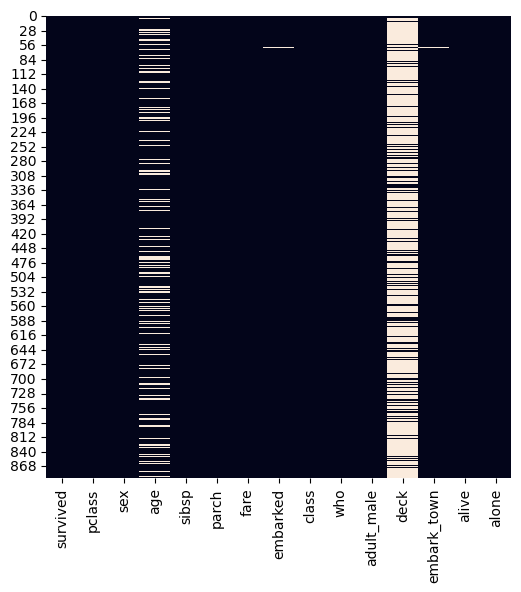

In [55]:
# Load data set
df = sns.load_dataset('titanic')
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [56]:
print(df.isnull().sum().sort_values(ascending=False))
print(round(df.isnull().sum().sort_values(ascending=False)/ len(df)*100, 2))

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64
deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64


<Axes: >

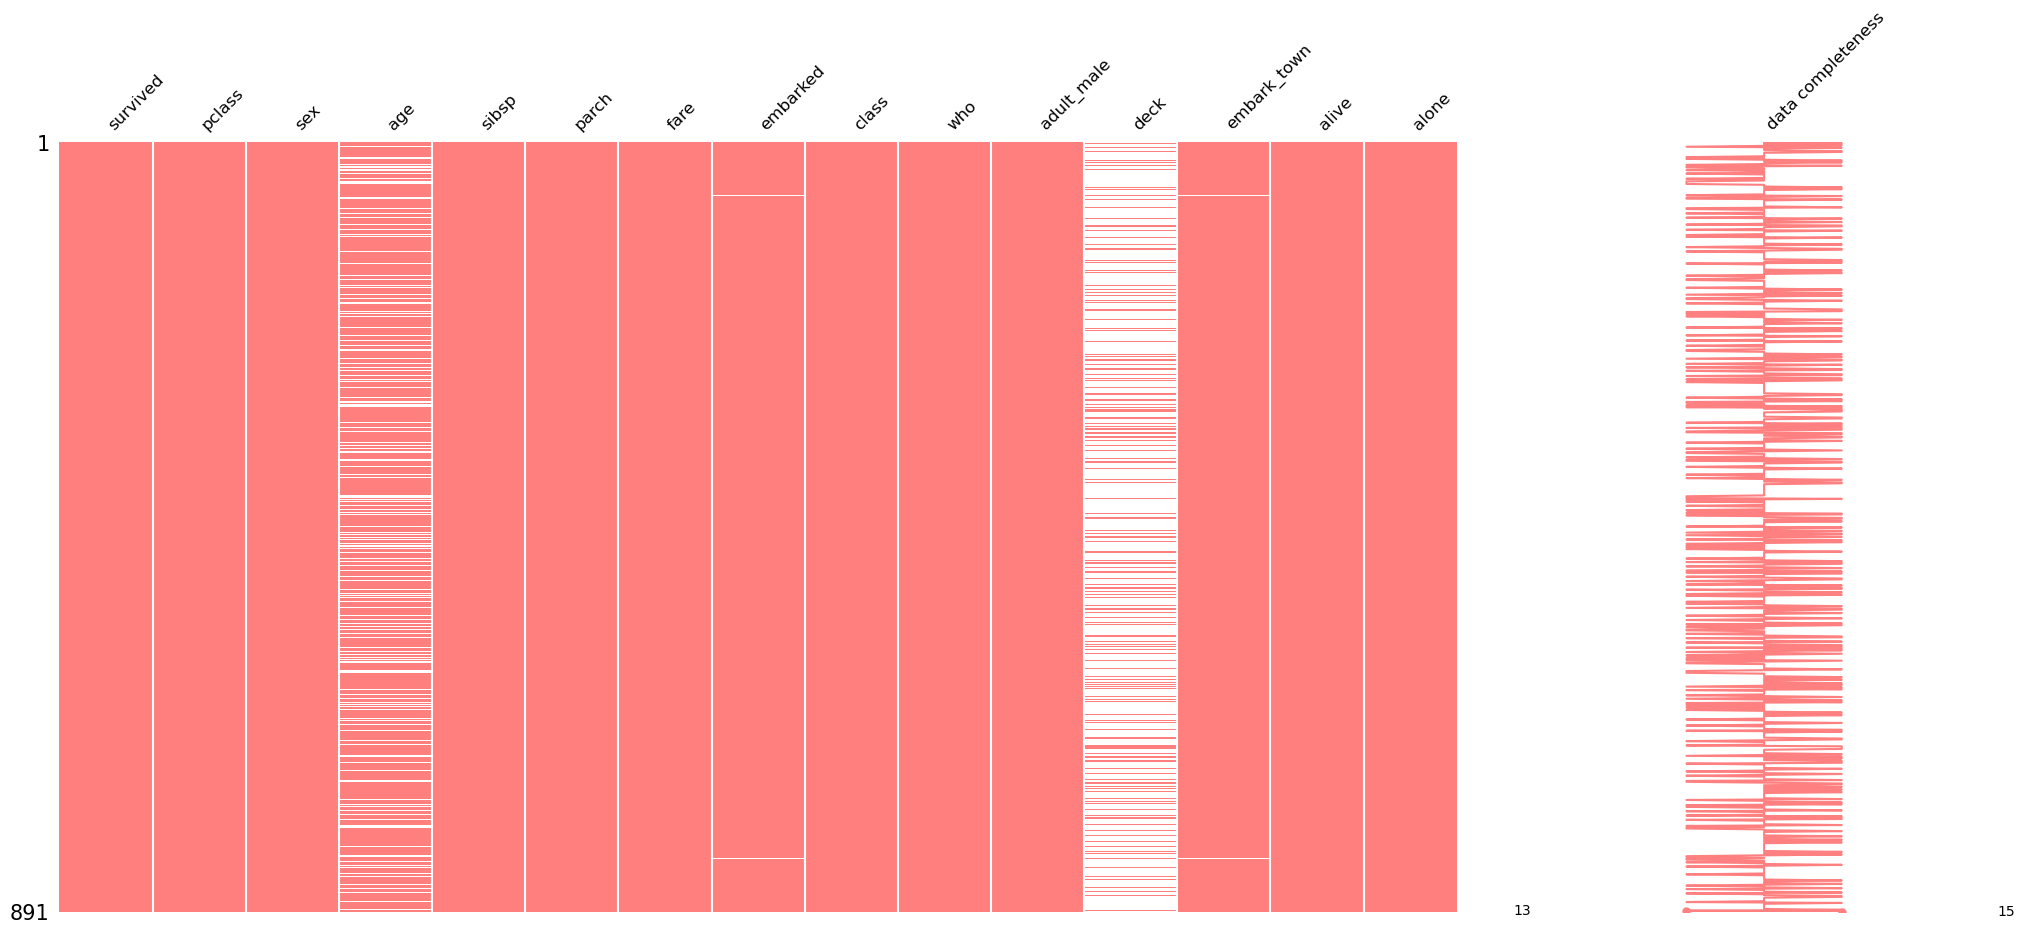

In [57]:
import missingno as msno
msno.matrix(df, labels=True, color=(1,.5,.5), fontsize=12, width_ratios=(6,2))

In [62]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df.isnull().sum()
# import missingno as msno
# msno.matrix(df, labels=True, color=(1,.5,.5), fontsize=12, width_ratios=(6,2))

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [65]:
df.drop('deck', axis = 1, inplace = True)

<Axes: >

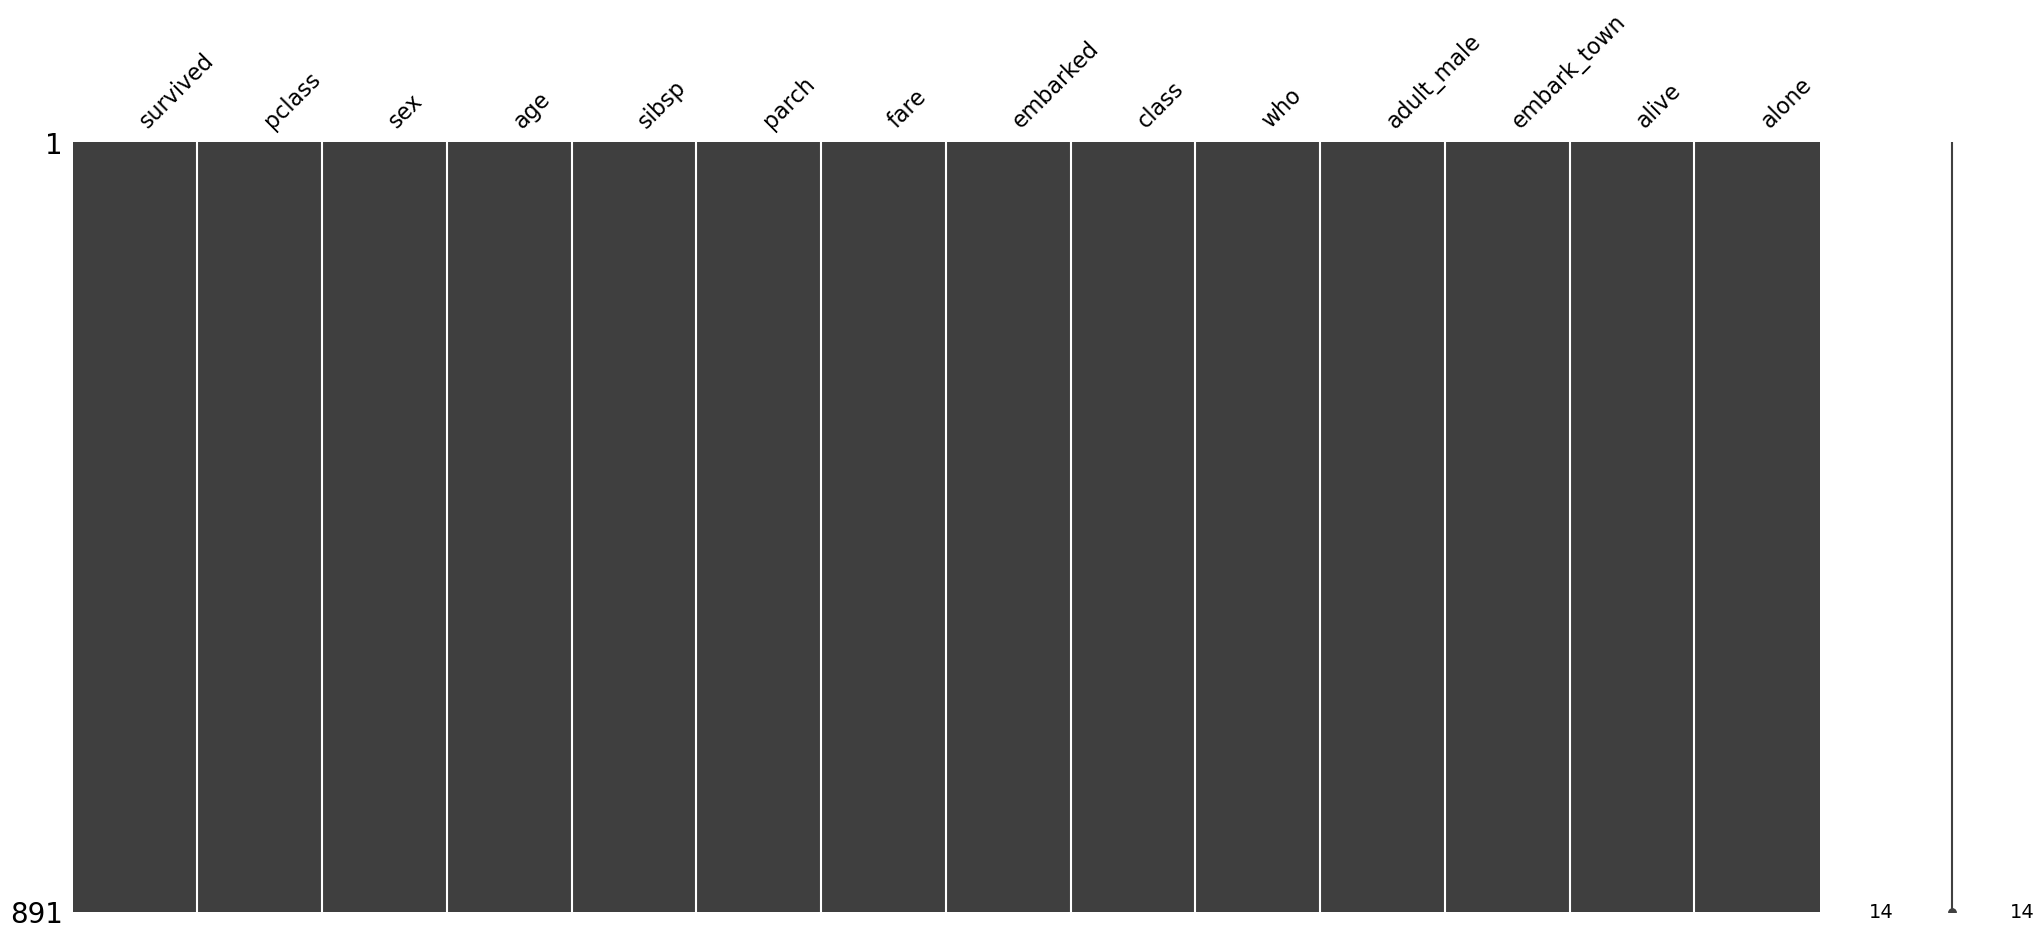

In [68]:
msno.matrix(df)

In [83]:
# my ML taks
dff = sns.load_dataset('titanic')
df3 = sns.load_dataset('titanic')
dff.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [81]:
imputer = SimpleImputer(strategy='mean')
dff['age'] = imputer.fit_transform(dff[['age']])
dff.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [87]:
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df3['age'] = imputer.fit_transform(df3[['age']])
df3.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [92]:
df4 = sns.load_dataset('titanic')
df4['age'] = df4['age'].ffill()
# df4['age'] = df4['age'].bfill()
df4.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64